In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.fft import fft, fftfreq

In [3]:
df=pd.read_csv('household_power_consumption.csv')
df.head(5)

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [4]:
df.isnull().sum()

index                       0
Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [5]:
df.interpolate(method='linear', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10844\2868764835.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [6]:
df.isnull().sum()

index                    0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
#Chuyển các cột cần thiết về kiểu float
cols_to_float = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2'
]
for col in cols_to_float:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [11]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Sắp xếp theo thời gian
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10844\4109748100.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)


In [13]:
from scipy.fft import fft, fftfreq
signal = df['Global_active_power'].values
n = len(signal)                  # Số mẫu
timestep = 60                   # Mỗi mẫu cách nhau 60 giây (1 phút)
sampling_rate = 1 / timestep 

In [14]:
#Thực hiện FFT
fft_vals = fft(signal)
fft_freqs = fftfreq(n, d=timestep)

In [15]:
half_n = n // 2
freqs = fft_freqs[:half_n]
powers = np.abs(fft_vals[:half_n])

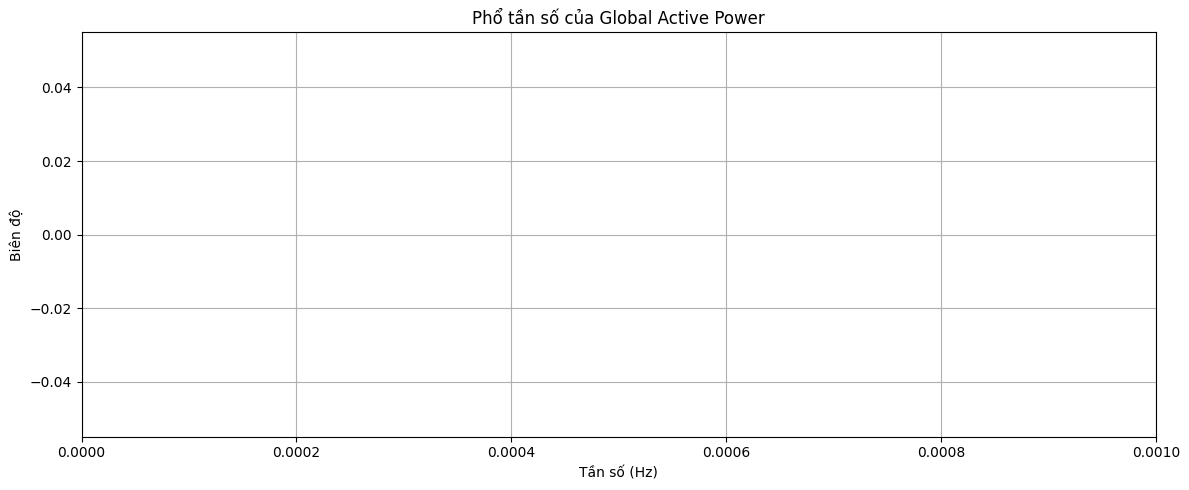

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(freqs, powers)
plt.title('Phổ tần số của Global Active Power')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.grid(True)
plt.xlim(0, 0.001)  # Phóng to vùng tần số thấp để dễ quan sát chu kỳ
plt.tight_layout()
plt.show()